In [1]:
import pandas as pd

In [2]:
# import BC_OngoingPrograms_EN_AllThemes_Categorized_Sorted_LongForm_Merged.csv
df = pd.read_csv('BC_OngoingPrograms_EN_AllThemes_Categorized_Sorted_LongForm_Merged.csv')

In [7]:
# see all columns names
print(df.columns)


Index(['business_registration_number',
       'total_eligible_amount_all_gifts_tax_receipts',
       'total_amount_received_from_other_registered_charities',
       'total_non_tax_receipted_revenue', 'total_revenue_federal_government',
       'total_revenue_provincial_government',
       'total_revenue_municipal_government',
       'total_received_all_sources_outside_canada',
       'total_interest_other_investment_income',
       'total_gross_income_renting_land_buildings',
       'total_non_tax_receipted_revenue_memberships_dues',
       'total_non_tax_receipted_revenue_fundraising',
       'total_revenue_sale_goods_services', 'other_revenue', 'total_revenue',
       'advertising_promotion', 'education_training_staff_volunteers',
       'total_compensation_charity_employees', 'total_all_other_expenditures',
       'total_expenditures_charitable_activities',
       'total_expenditures_management_administration',
       'total_expenditure_fundraising', 'total_other_expenditures',
     

In [8]:
# select data where fiscal_year = 2020
df_2020 = df[df['fiscal_year'] == 2020]

In [11]:
# see missing values
pd.set_option('display.max_rows', None)

print(df_2020.isnull().sum())
# see the whole output

business_registration_number                                      0
total_eligible_amount_all_gifts_tax_receipts                    105
total_amount_received_from_other_registered_charities           105
total_non_tax_receipted_revenue                                 105
total_revenue_federal_government                                105
total_revenue_provincial_government                             105
total_revenue_municipal_government                              105
total_received_all_sources_outside_canada                       105
total_interest_other_investment_income                          547
total_gross_income_renting_land_buildings                       652
total_non_tax_receipted_revenue_memberships_dues                105
total_non_tax_receipted_revenue_fundraising                     105
total_revenue_sale_goods_services                               105
other_revenue                                                   105
total_revenue                                   

In [ ]:
'Domain Focused Themes'
'Social Impact/ Advocacy Themes, Domain Focused Themes'
'Domain Focused Themes, Special Themes'

In [16]:
# now subset the data to only include if the column programs_themes_main contains {'Social Impact / Advocacy Themes', 'Domain Focused Themes'} {'Domain Focused Themes'} or {'Domain Focused Themes', 'Special Themes'}

# df_2020_domain_focused = df_2020[df_2020['programs_themes_main'].str.contains('Domain Focused Themes|Social Impact/ Advocacy Themes, Domain Focused Themes|Domain Focused Themes, Special Themes', na=False)]

In [69]:
# Define the set of strings
strings = [
    "{'Social Impact / Advocacy Themes', 'Domain Focused Themes'}",
    "{'Domain Focused Themes'}",
    "{'Domain Focused Themes', 'Special Themes'}"
]

# Subset the DataFrame
df_subset = df_2020[df_2020['programs_themes_main'].isin(strings)]

In [70]:
# see unique in the column programs_themes_main
print(df_subset['programs_themes_main'].unique())
# {'Social Impact / Advocacy Themes', 'Domain Focused Themes'}
# {'Domain Focused Themes'}
# {'Domain Focused Themes', 'Special Themes'}

["{'Social Impact / Advocacy Themes', 'Domain Focused Themes'}"
 "{'Domain Focused Themes'}" "{'Domain Focused Themes', 'Special Themes'}"]


In [56]:
# see first 30 rows
# see all columns in output
# pd.set_option('display.max_columns', None)
# df_subset.head(30)

In [71]:
# see columns where missing values are greater than 300 and put in a list
missing_values = df_subset.columns[df_subset.isnull().sum() > 300].tolist()
missing_values

# remove columns with missing values greater than 300
df_subset = df_subset.drop(columns=missing_values)

In [72]:
# see missing values
print(df_subset.isnull().sum())

business_registration_number                               0
total_eligible_amount_all_gifts_tax_receipts              63
total_amount_received_from_other_registered_charities     63
total_non_tax_receipted_revenue                           63
total_revenue_federal_government                          63
total_revenue_provincial_government                       63
total_revenue_municipal_government                        63
total_received_all_sources_outside_canada                 63
total_non_tax_receipted_revenue_memberships_dues          63
total_non_tax_receipted_revenue_fundraising               63
total_revenue_sale_goods_services                         63
other_revenue                                             63
total_revenue                                             62
advertising_promotion                                     63
total_all_other_expenditures                              63
total_expenditures_charitable_activities                  63
total_expenditures_manag

In [73]:
# impute missing values with 0
df_subset = df_subset.fillna(0)

In [74]:
# one hot encode the column programs_themes_main and keep it int
df_subset = pd.get_dummies(df_subset, columns=['programs_themes_main'], dtype=int)


In [78]:
# see non-numeric columns
non_numeric = df_subset.select_dtypes(exclude=['int', 'float']).columns.tolist()
non_numeric

['business_registration_number',
 'category',
 'type_of_organization',
 'city',
 'designation',
 'province',
 'registration_date',
 'subcategory',
 'total_non_government_revenue',
 'organization_legal_name',
 'total_revenue_duplicate_master_4700',
 'revenue_bucket_calc',
 'prog_desc',
 'prog_desc_detailed',
 'ridings',
 'postal_code',
 'fiscal_year',
 'ongoing_programs',
 'program_desc_lang',
 'programs_desc',
 'programs_themes',
 'programs_themes_common',
 'adj_avg_jw_score_bin',
 'program_dance_movement',
 'program_development_collaboration',
 'program_education_professional_development',
 'program_literature_media',
 'program_music_vocal_arts',
 'program_scholarships_funding',
 'program_theatre_performance_arts',
 'program_visual_arts_craft',
 'program_youth',
 'program_accessibility_diversity_inclusion',
 'program_community_engagement_outreach',
 'program_cultural_heritage_preservation',
 'program_covid_adaptation',
 'program_health_wellness',
 'program_miscellaneous',
 'program_te

In [76]:
# Replace '$-' with 0 in the 'total_non_government_revenue' column
df_subset['total_non_government_revenue'] = df_subset['total_non_government_revenue'].replace('$-', 0)

# Convert the column to numeric
df_subset['total_non_government_revenue'] = pd.to_numeric(df_subset['total_non_government_revenue'], errors='coerce')

# put 0 in the 'total_non_government_revenue' column where there is a missing value
df_subset['total_non_government_revenue'] = df_subset['total_non_government_revenue'].fillna(0)
# remove business_registration_number and fiscal_year columns

In [79]:
# select numeric columns and save to a new dataframe
df_subset_numeric = df_subset.select_dtypes(include=['int', 'float'])

In [46]:
# build a regression model to predict the column total_government_revenue_federal_provincial_municipal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


In [80]:
# build the model
X = df_subset_numeric.drop(columns=['total_government_revenue_federal_provincial_municipal'])
y = df_subset_numeric['total_government_revenue_federal_provincial_municipal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))


2.1601518143141607e-09


In [81]:
# display more metrics
from sklearn.metrics import mean_absolute_error, r2_score
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


1.7919526561803004e-09
1.0


In [83]:
# apply ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))



1.2139131025227345e-07
6.545003017148702e-08
1.0


C:\Users\Keshav Vishnoi\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.87992e-17): result may not be accurate.
  overwrite_a=True).T


In [84]:
# see the coefficients
coefficients = pd.DataFrame({'variable': X.columns, 'coefficient': model.coef_})
coefficients = coefficients.sort_values(by='coefficient', ascending=False)
print(coefficients)


                                             variable   coefficient
23                           total_government_revenue  1.000000e+00
28     programs_themes_main_{'Domain Focused Themes'}  9.459489e-12
27  programs_themes_main_{'Domain Focused Themes',...  5.119632e-12
25                                       avg_jw_score  5.083121e-12
0        total_eligible_amount_all_gifts_tax_receipts  2.449543e-15
6           total_received_all_sources_outside_canada  1.319067e-15
1   total_amount_received_from_other_registered_ch...  7.771561e-16
10                                      other_revenue  7.444132e-16
14           total_expenditures_charitable_activities  5.898060e-16
5                  total_revenue_municipal_government  4.731458e-16
3                    total_revenue_federal_government  4.041906e-16
7    total_non_tax_receipted_revenue_memberships_dues  3.451016e-16
9                   total_revenue_sale_goods_services  1.595946e-16
24                              long_term_invest

In [87]:
# see feature importance for linear regression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# build the model
X = df_subset_numeric.drop(columns=['total_government_revenue_federal_provincial_municipal'])
y = df_subset_numeric['total_government_revenue_federal_provincial_municipal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
# print r2
print(r2_score(y_test, y_pred))



103446.98906885735
0.5892333240550407


In [88]:
# see multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


                                            variables          VIF
0                                               const     0.000000
1        total_eligible_amount_all_gifts_tax_receipts    23.837097
2   total_amount_received_from_other_registered_ch...    15.070324
3                     total_non_tax_receipted_revenue          inf
4                    total_revenue_federal_government   379.478863
5                 total_revenue_provincial_government    60.845868
6                  total_revenue_municipal_government   113.556269
7           total_received_all_sources_outside_canada          inf
8    total_non_tax_receipted_revenue_memberships_dues          inf
9         total_non_tax_receipted_revenue_fundraising          inf
10                  total_revenue_sale_goods_services    76.757222
11                                      other_revenue     4.443825
12                                      total_revenue   603.941864
13                              advertising_promotion    10.05

C:\Users\Keshav Vishnoi\AppData\Roaming\Python\Python36\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Keshav Vishnoi\AppData\Roaming\Python\Python36\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


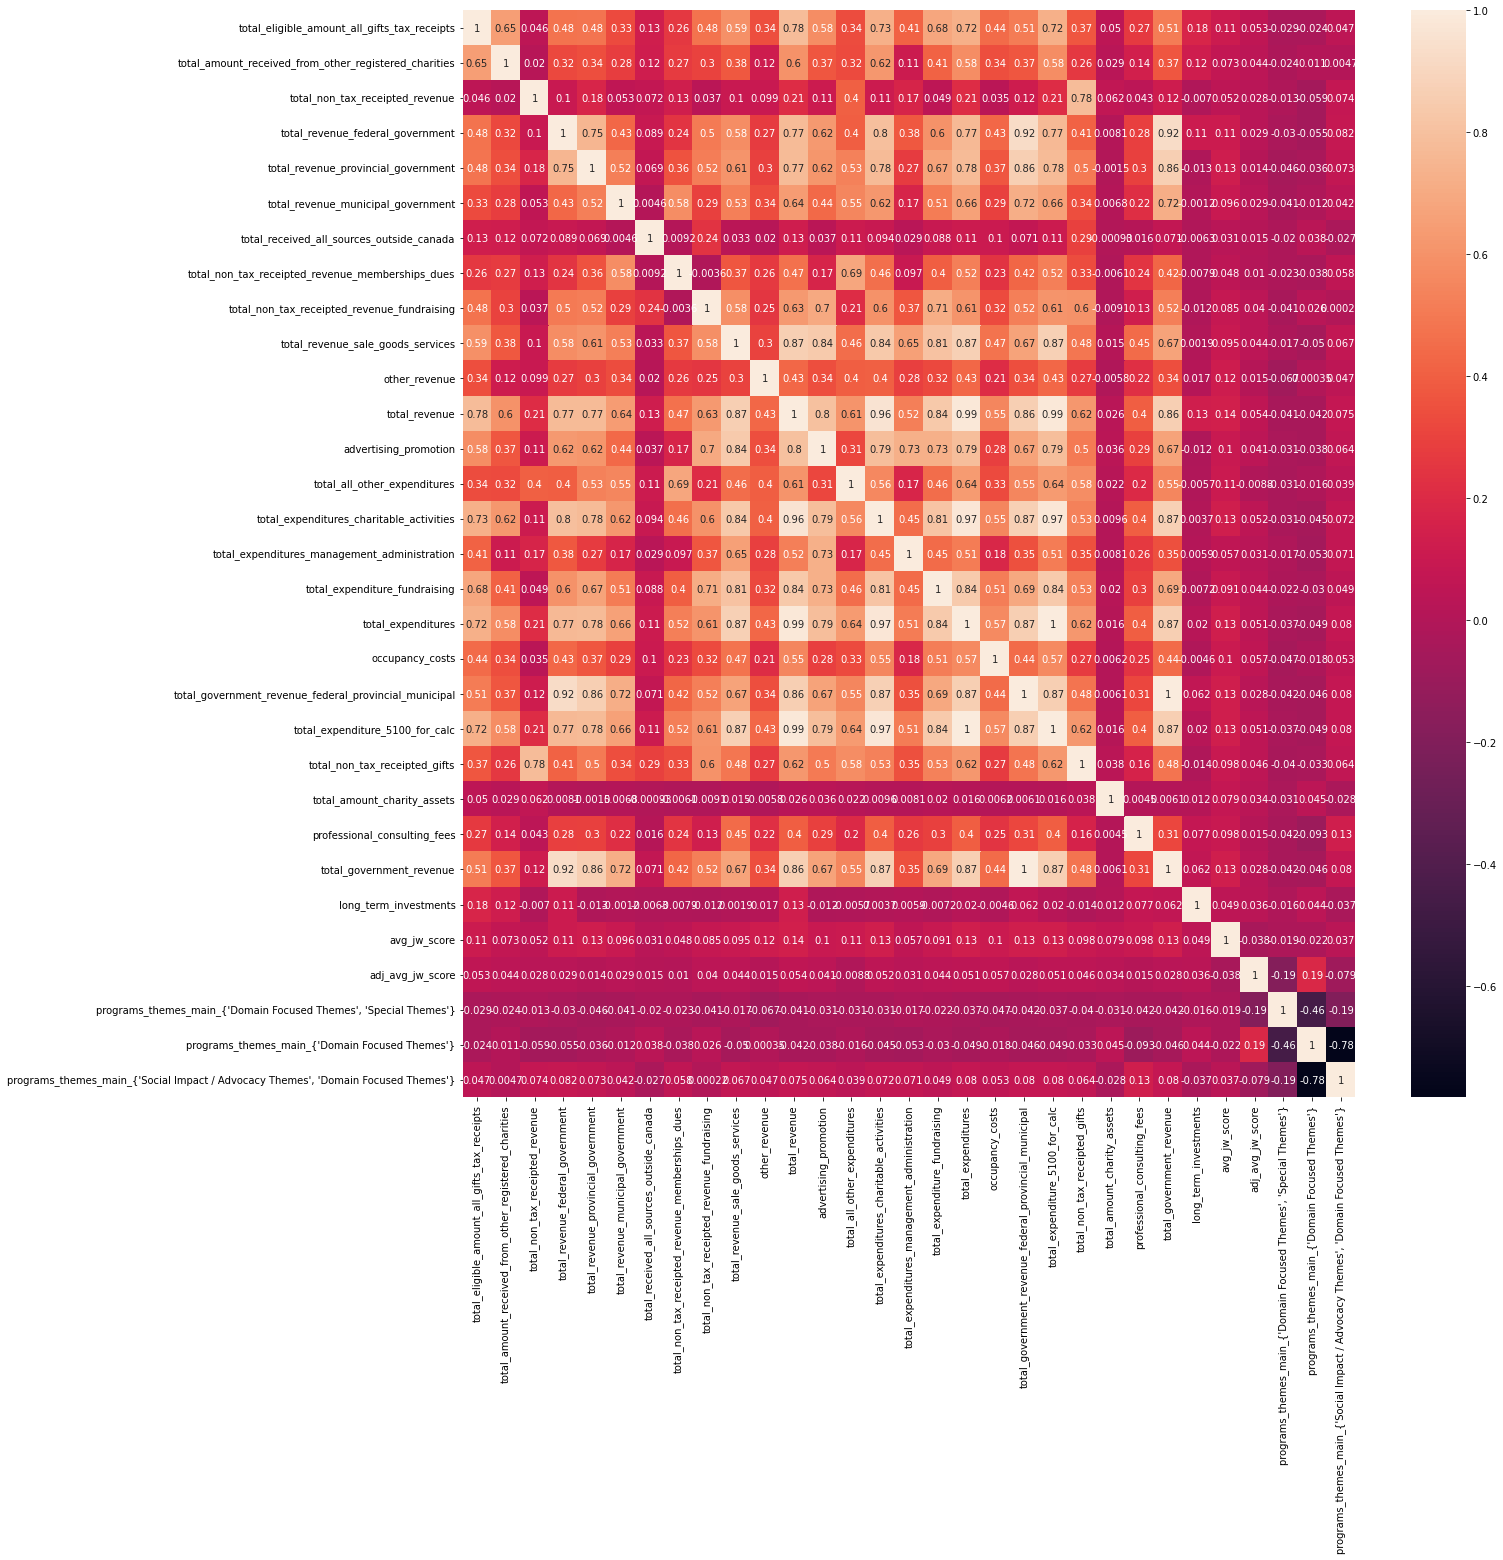

In [90]:
# plot correlation matrix
correlation = df_subset_numeric.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=True)
plt.show()



In [91]:
# make another copy of the dataframe df_subset
df_subset_copy = df_subset.copy()


In [92]:
# one hot encode the column city and keep it int
df_subset_copy = pd.get_dummies(df_subset_copy, columns=['city'], dtype=int)

In [94]:
# just keep the numeric columns
df_subset_copy = df_subset_copy.select_dtypes(include=['int', 'float'])

In [96]:
# remove columns that have total_revenue and total_expenditure in their names
df_subset_copy = df_subset_copy[df_subset_copy.columns.drop(list(df_subset_copy.filter(regex='total_revenue')))]
df_subset_copy = df_subset_copy[df_subset_copy.columns.drop(list(df_subset_copy.filter(regex='total_expenditure')))]

In [97]:
# remove columns that have jw_score in their names
df_subset_copy = df_subset_copy[df_subset_copy.columns.drop(list(df_subset_copy.filter(regex='jw_score')))]

In [99]:
# now build a linear regression model to predict the column total_government_revenue_federal_provincial_municipal
X = df_subset_copy.drop(columns=['total_government_revenue_federal_provincial_municipal'])
y = df_subset_copy['total_government_revenue_federal_provincial_municipal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3779)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


3.6627905439582295e-09
1.1885870020395513e-09
1.0


In [104]:
# see coefficients
coefficients = pd.DataFrame({'variable': X.columns, 'coefficient': model.coef_})
coefficients = coefficients.sort_values(by='coefficient', ascending=False)
print(coefficients)

                                              variable   coefficient
13                            total_government_revenue  1.000000e+00
3            total_received_all_sources_outside_canada  1.372799e-03
4     total_non_tax_receipted_revenue_memberships_dues  1.372799e-03
5          total_non_tax_receipted_revenue_fundraising  1.372799e-03
2                      total_non_tax_receipted_revenue  1.372799e-03
15   programs_themes_main_{'Domain Focused Themes',...  1.189052e-08
16      programs_themes_main_{'Domain Focused Themes'}  1.186331e-08
17   programs_themes_main_{'Social Impact / Advocac...  1.182904e-08
23                                      city_ARMSTRONG  1.371277e-09
39                                   city_COWICHAN BAY  4.173237e-10
54                                     city_GARDEN BAY  1.859027e-10
62                                      city_KIMBERLEY  3.386827e-11
79                                        city_OSOYOOS  5.039307e-12
0         total_eligible_amount_al

In [105]:
# see p-values
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                                              OLS Regression Results                                             
Dep. Variable:     total_government_revenue_federal_provincial_municipal   R-squared:                       1.000
Model:                                                               OLS   Adj. R-squared:                  1.000
Method:                                                    Least Squares   F-statistic:                 2.907e+28
Date:                                                   Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                                                           13:48:38   Log-Likelihood:                 13502.
No. Observations:                                                    770   AIC:                        -2.677e+04
Df Residuals:                                                        652   BIC:                        -2.622e+04
Df Model:                                                            117                